In [6]:
%matplotlib inline
import pandas as pd
import os
import matplotlib.pyplot as plt
from IPython.display import display

In [7]:
filepath = '/media/sf_VBox_Shared/CaseLaw/2018-01-29-lido/derived/'
art_nodes = pd.read_csv(os.path.join(filepath, 'article_nodes_nodup_min5_bimodal_titles.csv'))
case_nodes = pd.read_csv(os.path.join(filepath, 'case_nodes_simple_bimodal_titles.csv'))
bimodal_links = pd.read_csv(os.path.join(filepath, 'case_to_article_title_links.csv'))
bimodal_clusters = pd.read_csv(os.path.join(filepath, 'bimodal_clusters_titles.csv'))

In [9]:
print(art_nodes.shape, case_nodes.shape)
bimodal_clusters.type.value_counts()

(38328, 5) (419329, 7)


case       419329
article     38328
Name: type, dtype: int64

In [10]:
print("Number of communities: {}".format(bimodal_clusters['community'].nunique()))
print("Number of communities in largest cc: {}".format(bimodal_clusters[bimodal_clusters['cc']==0]['community'].nunique()))

Number of communities: 6849
Number of communities in largest cc: 6320


In [11]:
comm_counts = bimodal_clusters.groupby(['community', 'type']).count()['name'].unstack()

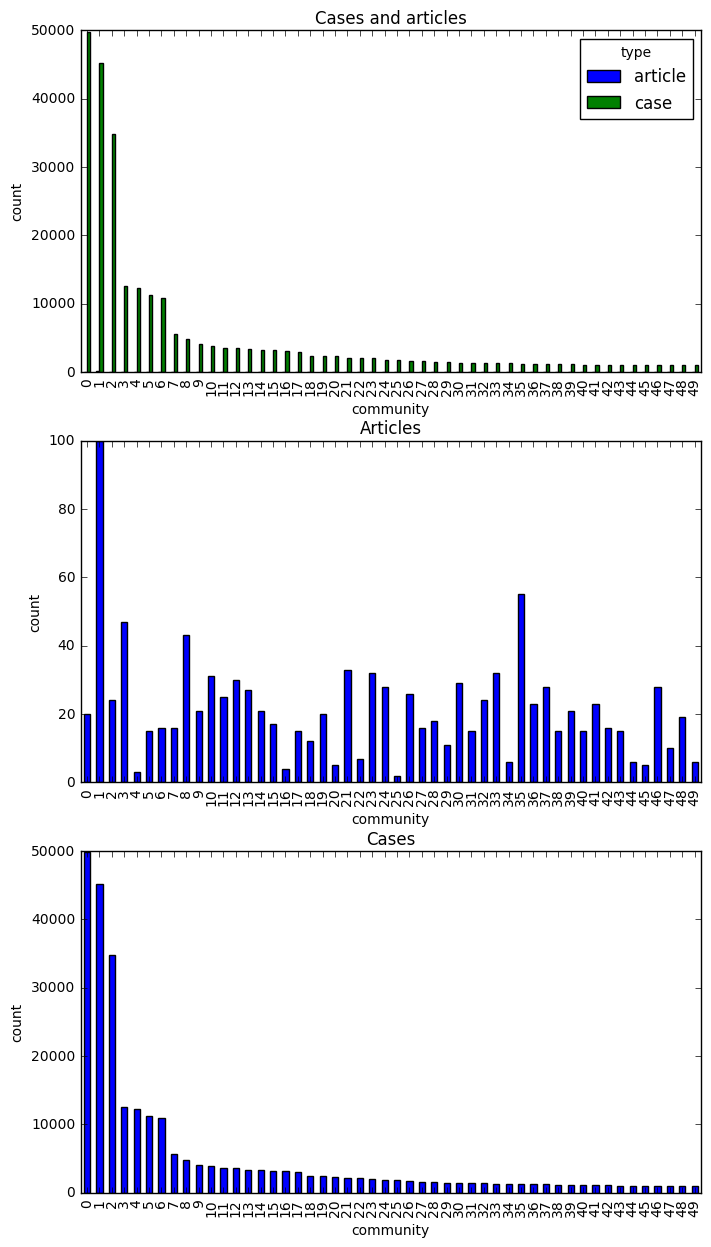

In [24]:
fig, axes = plt.subplots(3, 1, figsize=(8, 15))

n = 50

comm_counts[:n].plot(kind='bar', ax=axes[0], title='Cases and articles')
axes[0].set_ylabel('count')
comm_counts['article'][:n].plot(kind='bar', ax=axes[1], title='Articles')
axes[1].set_ylabel('count')
comm_counts['case'][:n].plot(kind='bar', ax=axes[2], title='Cases')
axes[2].set_ylabel('count')

In [25]:
largest_coms = bimodal_clusters.community.value_counts().index

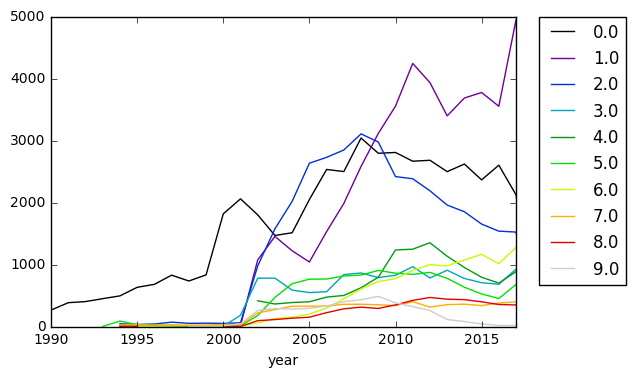

In [26]:
df_plot = case_nodes[case_nodes.community_bimodal.isin(largest_coms[:10])]
df_plot.groupby(['year','community_bimodal']).count()['ecli'].unstack().plot(colormap='nipy_spectral')
plt.gca().set_xlim(1990, 2017)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## compare with courts

In [27]:
courts = pd.read_csv(os.path.join(filepath, 'court_nodes_corrected.csv'))

In [28]:
case_nodes_courts = pd.merge(case_nodes, courts, how='left', left_on='court', right_on='id')

In [29]:
case_nodes_courts.Type.value_counts()

Rechtbank                       139952
Gerechtshof                      70281
Raad van State                   56521
Centrale Raad van Beroep         50491
ECHR                             44848
Hoge Raad                        26203
Parket                           19145
College van beroep                7438
Koninkrijksinstantie              2297
Kantongerecht                     1101
Buitenlandse instanties            468
TuchtrechtelijkeInstantie          153
AndereGerechtelijkeInstantie        35
Name: Type, dtype: int64

In [30]:
case_nodes_courts[case_nodes_courts.Type.isnull()].court.value_counts()

TGZRAMS    70
TGZRZWO    52
TGZRSGR    45
TGZREIN    35
TGZRGRO    25
KTGGNL     18
KTGDEV     14
KTGALK     13
KTGTIL     11
KTGGRO     11
KTGWAG     10
KTGLDN     10
KTGZUT      9
KTGBOZ      9
KTGDOR      9
KTGOBL      6
KTGASS      5
KTGGRC      5
KTGHRV      4
KTGHRN      4
KTGROE      3
KTGBOX      3
TADRAMS     2
TRMTAMS     2
KTGMEP      2
TAHVD       2
ORBAACM     2
KTGHMD      2
KTGZEV      2
KTGZIE      2
KTGSNK      2
KTGDHD      1
ORBANAA     1
OGANA       1
KTGWIN      1
TADRARN     1
TNOKMAA     1
Name: court, dtype: int64

In [31]:
case_nodes_courts.loc[case_nodes_courts.Type.isnull(), 'Type'] = 'AndereGerechtelijkeInstantie'

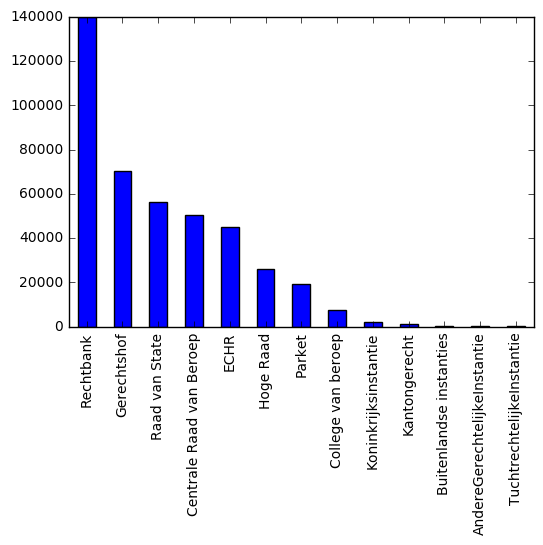

In [32]:
case_nodes_courts.Type.value_counts().plot.bar()

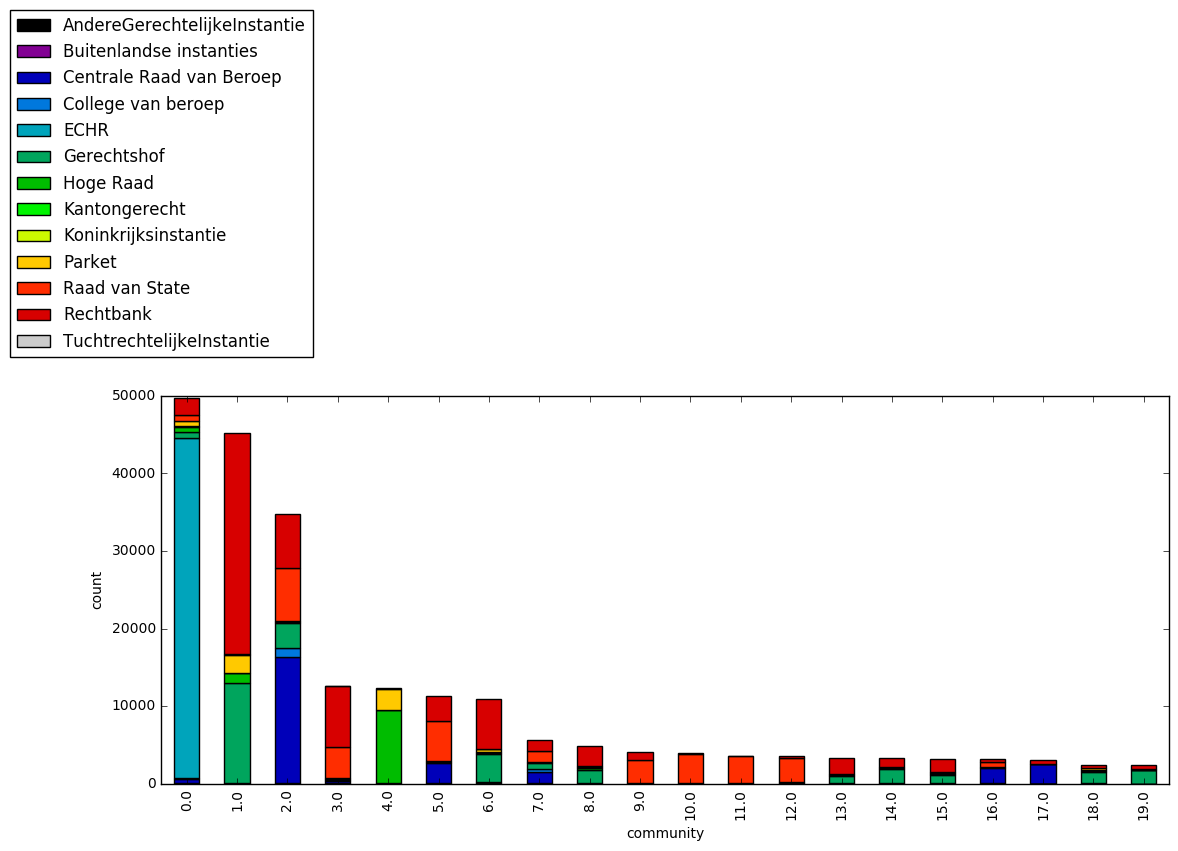

In [35]:
df_plot = case_nodes_courts[case_nodes_courts.community_bimodal.isin(largest_coms[:20])]
ax = df_plot.groupby(['community_bimodal', 'Type']).count()['ecli'].unstack().plot.bar(stacked=True, colormap='nipy_spectral', figsize=(13,5))
ax.set_ylabel('count')
ax.set_xlabel('community')
plt.legend(bbox_to_anchor=(0, 1.1),loc=8, borderaxespad=0.)
plt.show()

In [42]:
for com in [0, 1, 3, 4]:
    nodes_sub = art_nodes[art_nodes.community==com]
    print('Community {}:'.format(com))
    print(nodes_sub['id'].values)

Community 0:
['Burgerlijk Wetboek Boek 6, Artikel 196c'
 'Verdrag tot bescherming van de rechten van de mens en de fundamentele vrijheden, Artikel 1'
 'Verdrag tot bescherming van de rechten van de mens en de fundamentele vrijheden, Artikel 2'
 'Verdrag tot bescherming van de rechten van de mens en de fundamentele vrijheden, Artikel 3'
 'Verdrag tot bescherming van de rechten van de mens en de fundamentele vrijheden, Artikel 5'
 'Verdrag tot bescherming van de rechten van de mens en de fundamentele vrijheden, Artikel 6'
 'Verdrag tot bescherming van de rechten van de mens en de fundamentele vrijheden, Artikel 7'
 'Verdrag tot bescherming van de rechten van de mens en de fundamentele vrijheden, Artikel 8'
 'Verdrag tot bescherming van de rechten van de mens en de fundamentele vrijheden, Artikel 10'
 'Verdrag tot bescherming van de rechten van de mens en de fundamentele vrijheden, Artikel 13'
 'Verdrag tot bescherming van de rechten van de mens en de fundamentele vrijheden, Artikel 14'
 

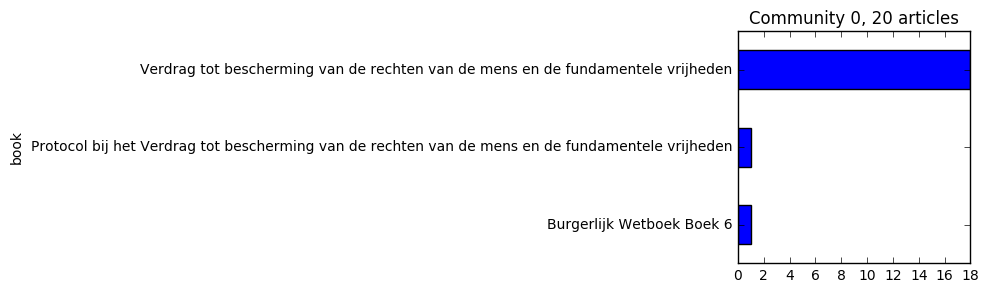

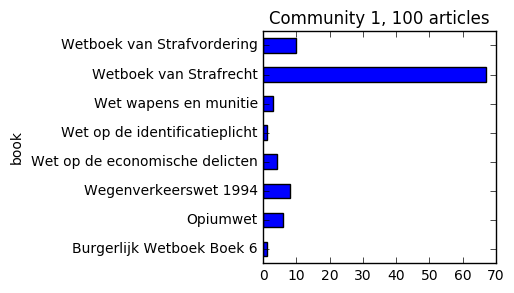

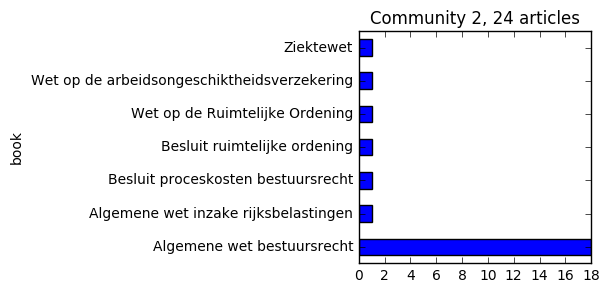

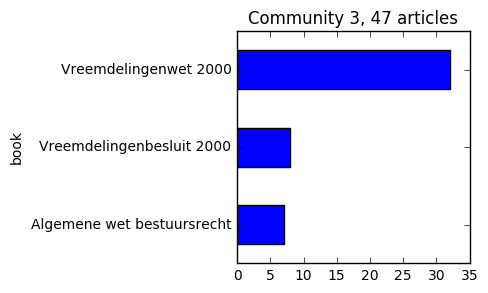

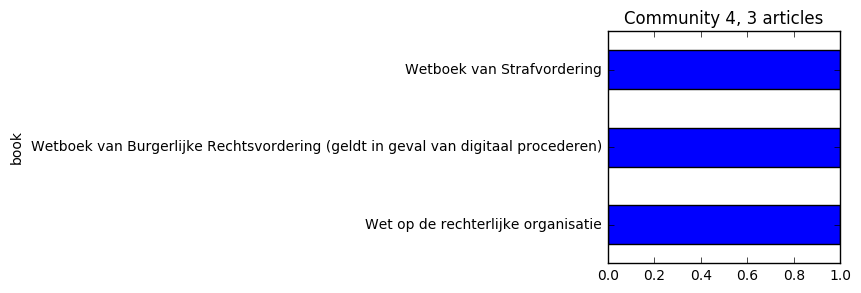

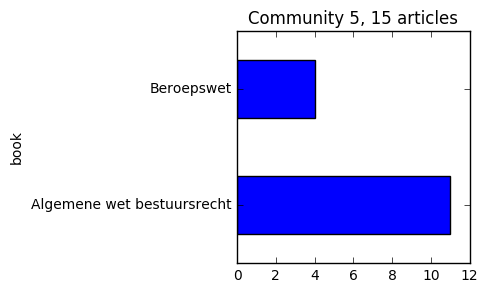

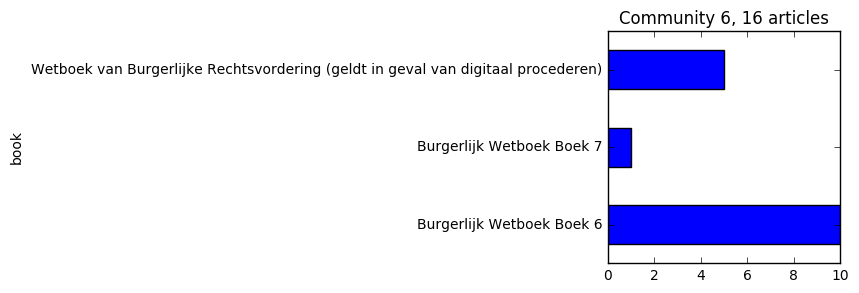

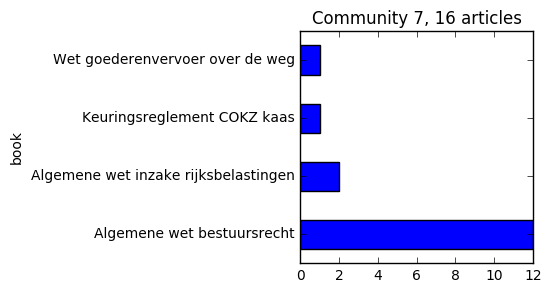

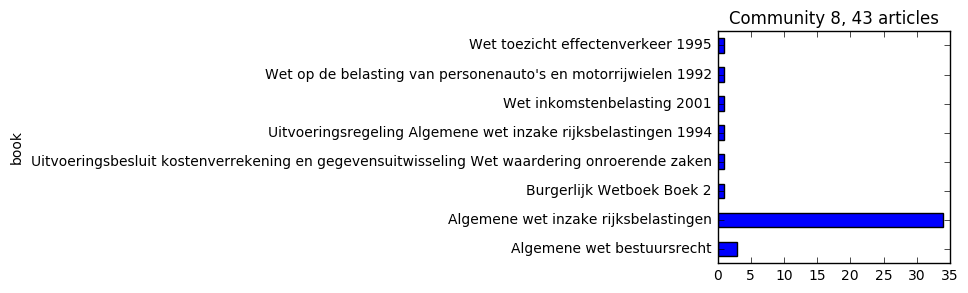

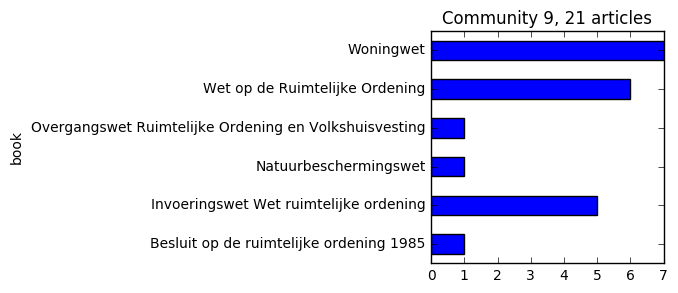

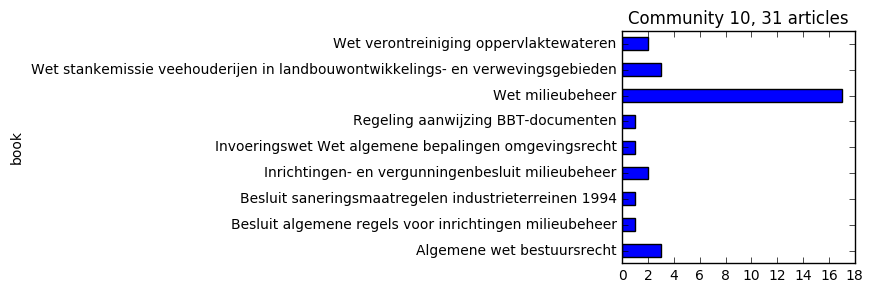

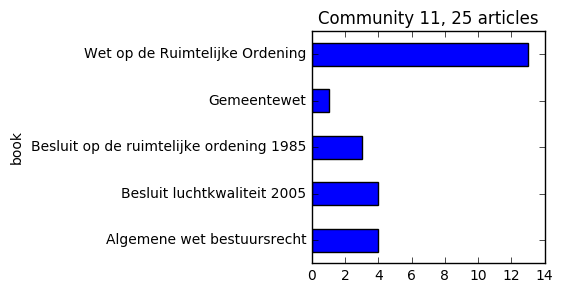

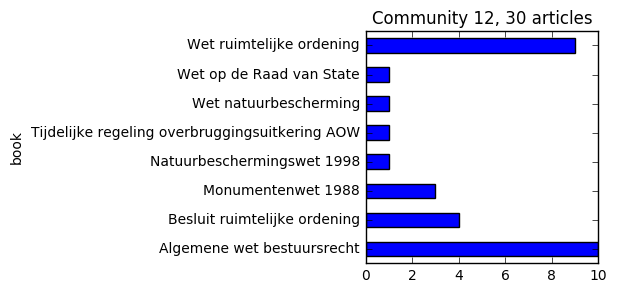

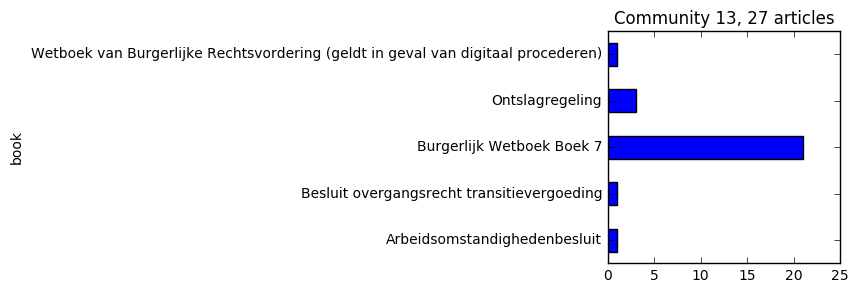

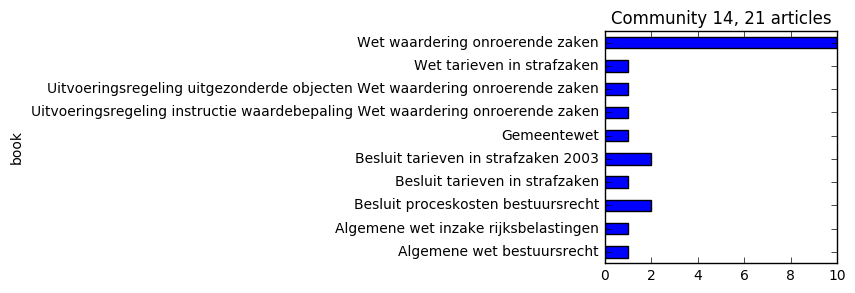

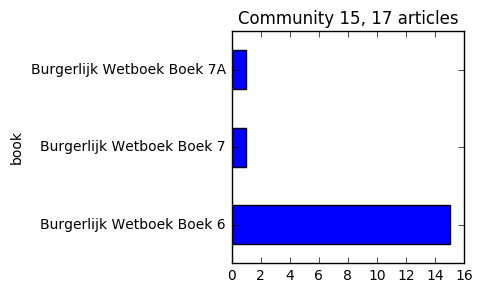

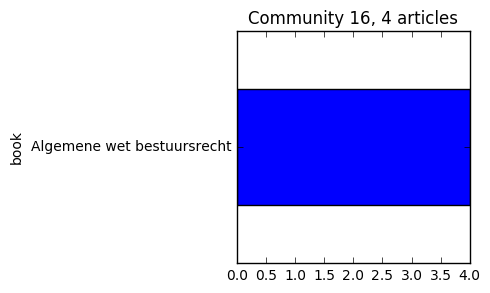

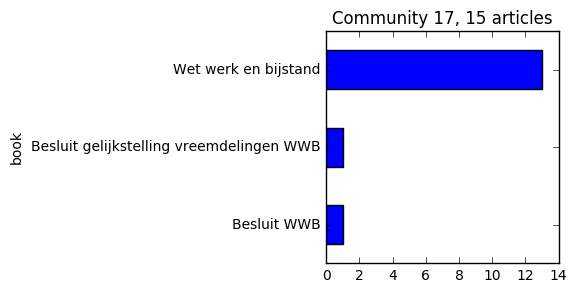

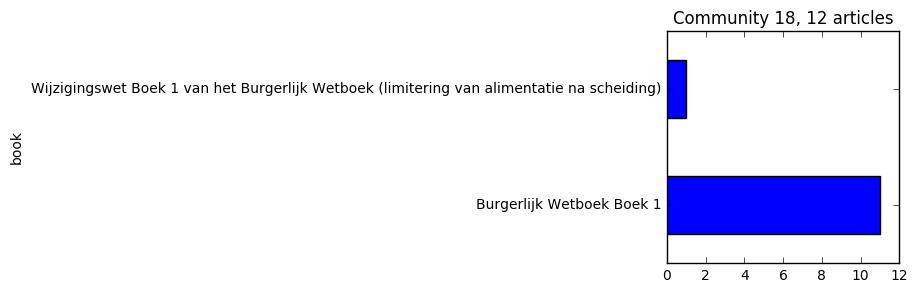

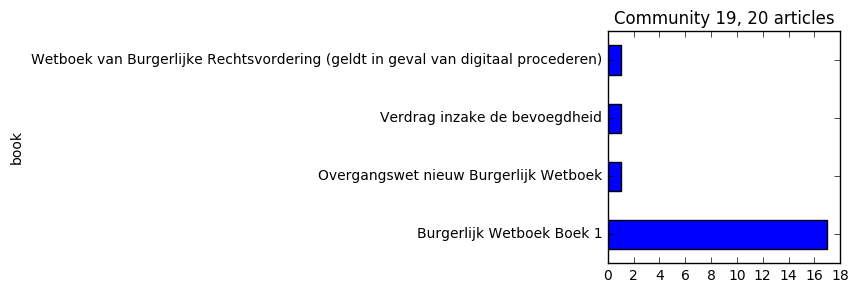

In [34]:
for com in largest_coms[:20]:
    nodes_sub = art_nodes[art_nodes.community==com]
    nodes_sub.groupby(['book']).count()['id'].plot.barh(figsize=(3,3))
    plt.title('Community {}, {} articles'.format(com, len(nodes_sub)))
    plt.show()
    #display(nodes_sub)

## summary statistics

In [50]:
import nwtools.communities
import networkx as nx

In [53]:
graph = nx.from_pandas_edgelist(bimodal_links, source='source', target='target')
partition = bimodal_clusters.set_index('name')['community'].to_dict()

In [54]:
com_statistics = nwtools.communities.partition_statistics(partition, graph)

com_statistics_df = pd.DataFrame.from_dict(com_statistics, orient='index')

In [55]:
com_statistics_df.head()

,average_degree,average_external_degree,conductance,external_degree,total_degree,size,average_internal_degree,internal_degree
0,5.597986,3.259773,0.582312,164110,281825,50344,2.338213,117715
1,16.488184,9.329920,0.565855,396391,700517,42486,7.158264,304126
2,6.689609,4.878235,0.729226,173792,238324,35626,1.811374,64532
3,3.757109,2.726453,0.725678,39310,54170,14418,1.030656,14860
4,9.695019,6.548581,0.675458,84922,125725,12968,3.146437,40803
